interactive(children=(IntSlider(value=0, description='step', max=149), Output()), _dom_classes=('widget-intera…

<function __main__.display_slice(step)>

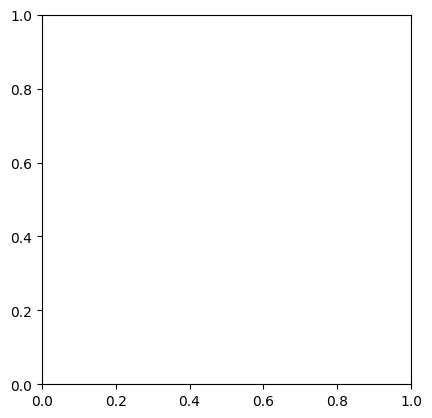

In [9]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider
from PIL import Image
import os

# Replace 'path/to/your/images' with the path to your image folder
image_folder = 'results/blind_blur/progress/img/'

# Create a list of image filenames in the folder
images = [os.path.join(image_folder, img) for img in sorted(os.listdir(image_folder))]
# Read images and store them in a list
image_list = [Image.open(image) for image in images]

# Now, image_list is a list of PIL Image objects representing your images

# Function to display a slice of the volume
def display_slice(step):
    plt.imshow(image_list[step])
    plt.title(f'Step {step * 10}')
    plt.colorbar()
    plt.show()

# Using ipywidgets to create an interactive slider
interact(display_slice, step=IntSlider(min=0, max=len(image_list) - 1, step=1, value=0))

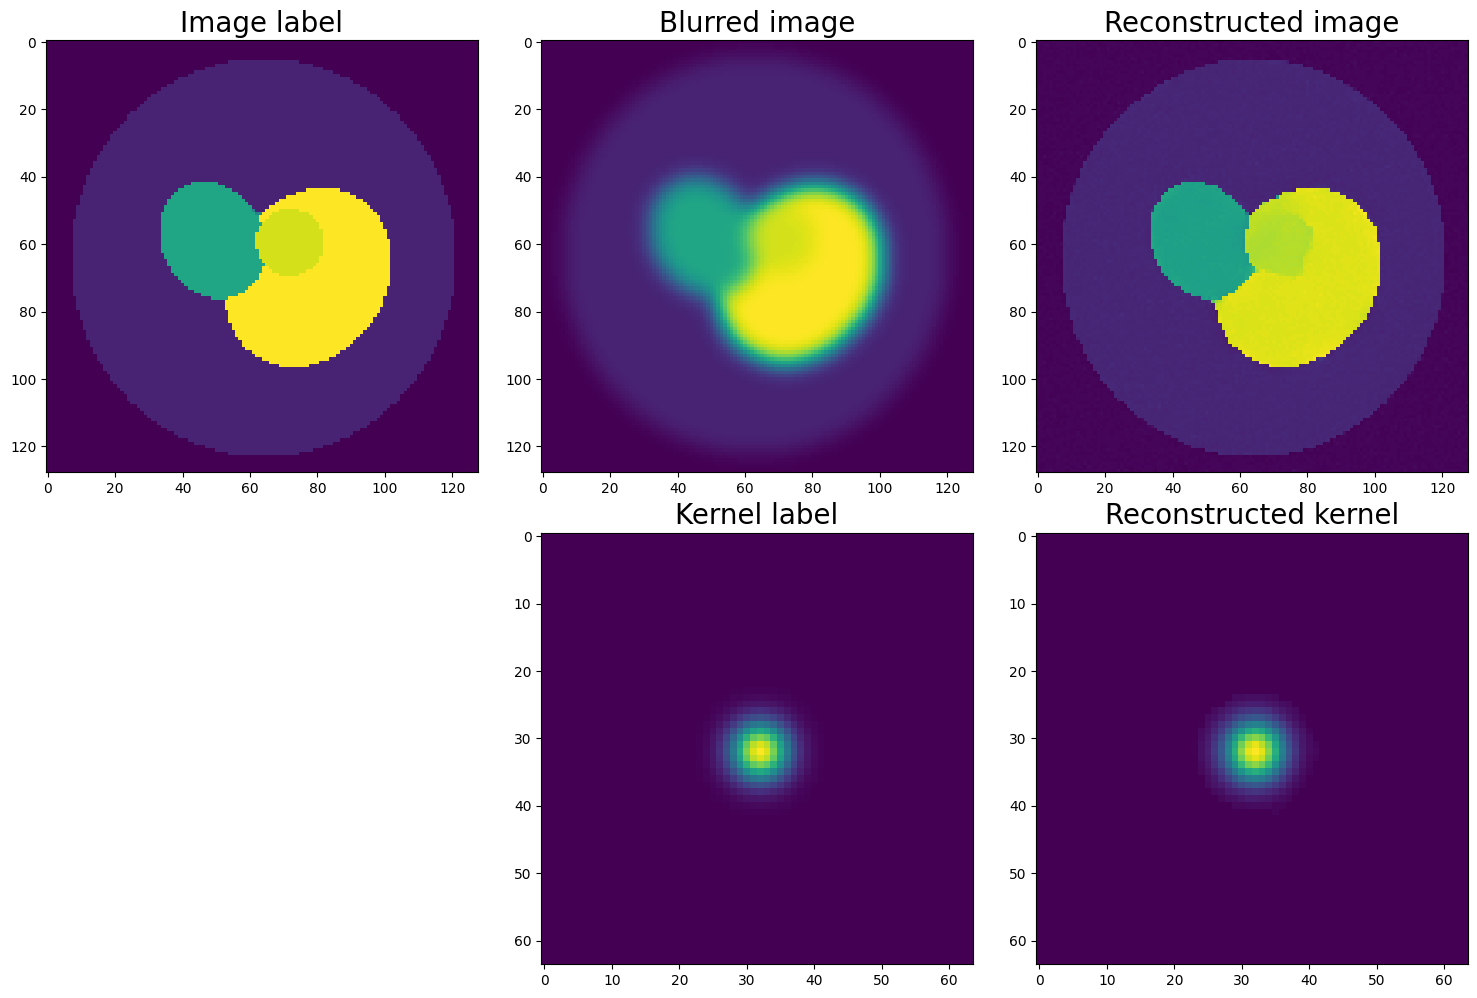

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
path_img_label = 'results/blind_blur/label/img_00000.png'
path_kernel_label = 'results/blind_blur/label/ker_00000.png'

path_img_input = 'results/blind_blur/input/00000.png'

path_img_recons = 'results/blind_blur/recon/img_00000.png'
path_kernel_recons = 'results/blind_blur/recon/ker_00000.png'

img_label = Image.open(path_img_label)
kernel_label = Image.open(path_kernel_label)
img_input = Image.open(path_img_input)
img_recons = Image.open(path_img_recons)
kernel_recons = Image.open(path_kernel_recons)

fontsize = 20
# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot data on each subplot
axs[0, 0].imshow(img_label)
axs[0, 0].set_title('Image label', fontsize=fontsize)

axs[0, 1].imshow(img_input)
axs[0, 1].set_title('Blurred image', fontsize=fontsize)

axs[0, 2].imshow(img_recons)
axs[0, 2].set_title('Reconstructed image', fontsize=fontsize)

axs[1, 1].imshow(kernel_label)
axs[1, 1].set_title('Kernel label', fontsize=fontsize)

axs[1, 2].imshow(kernel_recons)
axs[1, 2].set_title('Reconstructed kernel', fontsize=fontsize)

axs[1, 0].axis('off')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()
